# Fandagos Review Rating

In this project, we'll analyze more movie ratings data to determine whether there was any change in Fandango's rating system.

Hypothesis:

  * The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.

  * In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.

  * For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.


## Review Analysis BEFORE and AFTER bug correction

We'll work with two samples of movie ratings: the data in one sample was collected **prior** to Hickey's analysis,

while the other sample was collected **after**. Let's start by reading in the two samples (which are stored as CSV files) and exploring their structure.

Fandagos doc. is available here: https://github.com/fivethirtyeight/data/blob/master/fandango/README.md

  - fandango_score_comparison.csv **(PREVIOUS)** contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango.
  
  The data from Fandango was pulled on Aug. 24, 2015.

Movies 2016-2017 doc ins available here: https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md

  - movie_ratings_16_17.csv **(AFTER)** contains movie ratings data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017. As of March 22, 2017, the ratings were up to date. Significant changes should be expected mostly for movies released in 2017.



In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [4]:
# Fandagos Review RatinG



previous = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

previous.head(10)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


##Isolate Selected Columns

1- For the PREVIOUS's analysis, select the following columns: `'FILM'`, `'Fandango_Stars'`, `'Fandango_Ratingvalue'`, `'Fandango_votes'`, `'Fandango_Difference'`.

2- For the other data set, select the the following columns: `'movie'`, `'year'`, `'fandango'`.

3- Define the population of interest for our goal — remember that our **goal is to determine whether there was any change in Fandango's rating system after Hickey's analysis.**

In [5]:
previous_columns = [ 'FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']
after_columns = ['movie', 'year', 'fandango']

previous = previous[previous_columns].copy()
after = after[after_columns].copy()

print(previous.head(3))
#after.head(3)

                             FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   
2                  Ant-Man (2015)             5.0                   4.5   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5  


In [24]:
after.head(10)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0
6,A Street Cat Named Bob,2016,4.5
7,Alice Through the Looking Glass,2016,4.0
8,Allied,2016,4.0
9,Amateur Night,2016,3.5


##Define Population
remember that our **goal is to determine whether there was any change in Fandango's rating system after Hickey's analysis.**

 * Determine whether the sampling is random or not — did all the movies have an equal chance to be included in the two samples?

 * Our main variable is : `Fandango_Ratingvalue` from previous dataset and `fandango` from after dataset

## Sampling Process

From the datasets documentations we concluded that

**Previous:**
* The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
* The movie must have had tickets on sale in 2015.

**After**

* The movie must have been released in 2016 or later.
* The movie must have had a considerable number of votes and reviews (it's unclear how many from the README.md or from the data).

the sampling process is not random and probably not all movies were included


# New Goal

def: The population of interest changes and the samples we currently work with become representative.

The new goal is still a fairly good proxy for our initial goal, which was to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

## Selecting new samples

* Isolate the movies released in 2015 in a separate data set.
* Isolate the movies released in 2016 in another separate data set.



In the previous dataset there is no column YEAR. This values is extracted from FILME NAME (YEAR)

In [7]:
#Extracting year from previous dataset
previous['YEAR'] = previous['FILM'].str.extract(r"\s\((\d{4})\)$").astype(int) #extract (year) by reg. expressions

previous_2015 = previous[previous['YEAR']==2015]
after_2016 = after[after['year']==2016]

after_2016.head()
previous_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,YEAR
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


## Comparing Distribution Shapes for 2015 and 2016

Generate two kernel density plots on the same figure for the distribution of **movie ratings** if each sample.


Customize the graph such that:

1-It has a title with an increased font size.

2-It has labels for both the x and y-axis.

3-It has a legend which explains which distribution
4-is for 2015 and which is for 2016.

5-The x-axis starts at 0 and ends at 5 because movie ratings on Fandango start at 0 and end at 5.

6- The tick labels of the x-axis are: `[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]`.

It has the fivethirtyeight style (this is optional). You can change to this style by using plt.style.use('fivethirtyeight'). This line of code must be placed before the code that generates the kernel density plots.

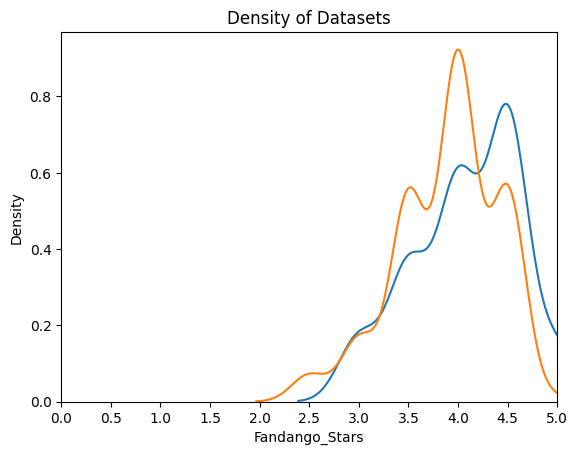

In [9]:
sns.kdeplot(data=previous_2015,x='Fandango_Stars',label="Density previous 2015")
sns.kdeplot(data=after_2016, x='fandango',label="Density after 2016")
plt.title("Density of Datasets")
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.xlim(0, 5)  # Set x-axis limits from 0 to 5
plt.show()

## Questions:

  **1- What is the shape of each distribution?**

    both distributions are left skewed

**2- How do their shapes compare?**

    as thay are left skewed, most of values tends to be to the right most (3,5 stars +)

**3- If their shapes are similar, is there anything that clearly differentiates them?**

    The 2 distributions can be differentiaded with its mean values. Previous 2025 mean is less than after 2026

**4-Can we see any evidence on the graph that suggests that there is indeed a change between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016?**

**5- Provided there's a difference, can we tell anything about the direction of the difference? In other words, were movies in 2016 rated lower or higher compared to 2015?**

  The slight left shift of the 2016 distribution is very interesting for our analysis. It shows that ratings were slightly lower in 2016 compared to 2015. This suggests that there was a difference indeed between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We can also see the direction of the difference: the ratings in 2016 were slightly lower compared to 2015.

#  Comparing Relative Frequencies

Examine the frequency distribution tables of the two distributions.

* The samples have different number of movies. Does it make sense to compare the two tables using absolute frequencies?

* If absolute frequencies are not useful here, would relative frequencies be of more help? If so, what would be better for readability — proportions or percentages?

In [14]:
# Freq. Distribution
freq_previous = previous['Fandango_Ratingvalue'].value_counts().sort_index()
freq_after = after['fandango'].value_counts().sort_index()

print(freq_previous)
print(freq_after)

Fandango_Ratingvalue
2.7     2
2.8     2
2.9     5
3.0     4
3.1     3
3.2     5
3.3     4
3.4     9
3.5     9
3.6     8
3.7     9
3.8     5
3.9    12
4.0     7
4.1    16
4.2    12
4.3    11
4.4     7
4.5     9
4.6     4
4.8     3
Name: count, dtype: int64
fandango
2.5     6
3.0    18
3.5    50
4.0    82
4.5    57
5.0     1
Name: count, dtype: int64


There are mostly 100 films more in 2016 dataset than 2015.

Using absolute frequencies (value_counts()) is not the best pratice. it is better to use relative frequencies (percentage) to compare them

In [32]:
# Freq. Distribution
freq_previous = previous['Fandango_Stars'].value_counts(normalize=True).sort_index()*100
freq_after = after['fandango'].value_counts(normalize=True).sort_index()*100

print(freq_previous)
print(freq_after)

Fandango_Stars
3.0     8.219178
3.5    18.493151
4.0    28.082192
4.5    37.671233
5.0     7.534247
Name: proportion, dtype: float64
fandango
2.5     2.803738
3.0     8.411215
3.5    23.364486
4.0    38.317757
4.5    26.635514
5.0     0.467290
Name: proportion, dtype: float64


#Determining the Direction of the Change

take each distribution of movie ratings and compute its `mean`, `median`, and `mode`, and then compare these statistics to determine what they tell about the direction of the difference.

In [27]:
#Computing Mean, median , mode

mean_2015 = previous['Fandango_Stars'].mean()
mean_2016 = after['fandango'].mean()

median_2015 = previous['Fandango_Stars'].median()
median_2016 = after['fandango'].median()

mode_2015 = previous['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = after['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary




,2015,2016
mean,4.089041,3.89486
median,4.000000,4.00000
mode,4.500000,4.00000


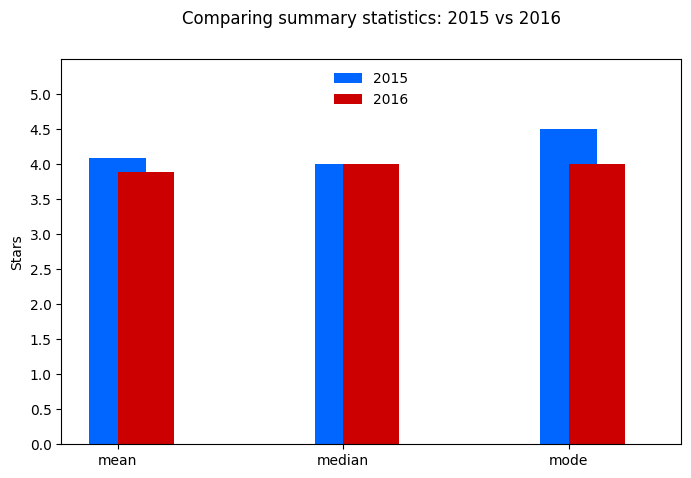

In [31]:
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

#Conclusion

The mean rating was lower in 2016 with approximately 0.2. This means a drop of almost 5% relative to the mean rating in 2015.

While the median is the same for both distributions, the mode is lower in 2016 by 0.5. Coupled with what we saw for the mean, the direction of the change we saw on the kernel density plot is confirmed: on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.

Our analysis showed that there is indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

We cannot be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system following Hickey's analysis.